In [3]:
import pandas as pd
df=pd.read_csv("car_website_data/deep_cleaned_data.csv")
df = df.drop('Unnamed: 0', axis=1)
df=df.dropna()
df

,Reviews
0,bought 2018 leaf sl new october 2018 home 220 ...
1,wanted get ev option offered u expensive found...
2,owned couple leaf first new style ’ happy stil...
3,really enjoy driving car perfect commute learn...
4,68yearold retiree stage life electric leaf rig...
...,...
78958,doesgeneral motor tax credit oh thats right gm...
78959,2024 honda prologue ev first look new allelect...
78960,new electric suv honda prologue 2024 officiall...
78961,new electric suv honda prologue 2024 officiall...


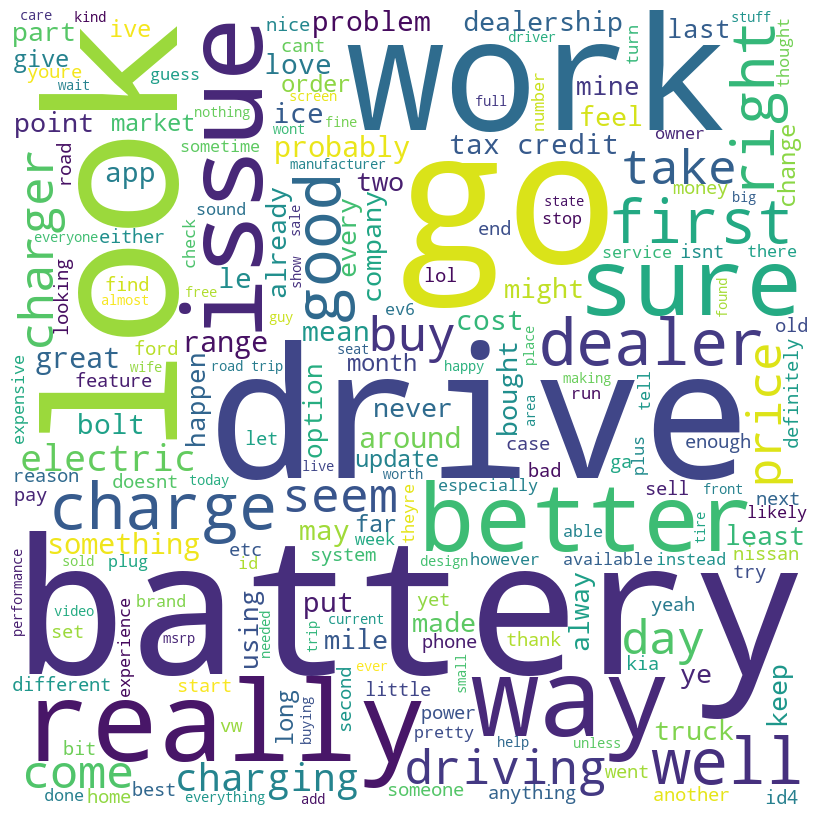

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments into a single string
comments = ' '.join(df['Reviews'])

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year'])

# Add the default set of stopwords from the WordCloud library
stopwords.update(stopwords)

# Create a WordCloud object with the specified stopwords
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                stopwords = stopwords).generate(comments)

# Display the generated image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Save the image to a file
wordcloud.to_file("wordcloud.png")

# Show the plot
plt.show()

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Reviews'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})

# Concatenate the original dataframe and the topics dataframe along the column axis
topic_df_with_topics = pd.concat([df, topics_df], axis=1)

topic_df_with_topics.to_csv("topic_df_with_topics.csv")

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# Calculate the similarity between each user review and the LDA topic distribution
user_topic_similarity = cosine_similarity(X_topics)

# Get the indices of the top 10% closest reviews for each user
num_reviews = user_topic_similarity.shape[0]
top_10pct_reviews = np.argsort(user_topic_similarity, axis=1)[:, -int(num_reviews*0.1):]

# Flatten the indices into a 1D array and filter the original dataframe
selected_review_indices = np.unique(top_10pct_reviews.flatten())
topic_df_with_topics_filtered = topic_df_with_topics.iloc[selected_review_indices]
topic_df_with_topics_filtered.to_csv("topic_df_with_topics_filtered.csv")

KeyboardInterrupt: 

In [5]:
import pandas as pd
df=pd.read_csv("topic_df_with_topics.csv")
df = df.drop('Unnamed: 0', axis=1)
df=df.dropna()
excluded_topics = ["Topic 1", "Topic 0", "Topic 3", "Topic 4", "Topic 9"]
general_df = df.loc[~df['Topic'].isin(excluded_topics)]


In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment(text):
    # Instantiate the sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Get the sentiment scores for the text
    scores = sid.polarity_scores(text)

    # Determine the sentiment label based on the score
    if scores['compound'] > 0:
        sentiment = 'positive'
    elif scores['compound'] < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return sentiment
import pandas as pd

# Apply the sentiment analysis function to each row of text
general_df['Sentiment'] = general_df['Reviews'].apply(get_sentiment)




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/b9/xvth5z3d0g725rzpttbd7rc80000gn/T/ipykernel_56089/668866.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_df['Sentiment'] = general_df['Reviews'].apply(get_sentiment)


In [7]:
df.to_csv("topic_sentiment_df.csv")

In [8]:
# Define the mapping dictionary
topic_mapping = {
    "Topic 2": 'appearance and features of EVs',
    "Topic 5": 'cost and price of EVs',
    "Topic 7": 'charging EVs',
    "Topic 8": 'apps and chargers for EVs',
    "Topic 6": 'market for EVs'
}
def map_topic(topic):
    return topic_mapping.get(topic, 'Unknown')
general_df['New_Topic'] = general_df['Topic'].apply(map_topic)


/var/folders/b9/xvth5z3d0g725rzpttbd7rc80000gn/T/ipykernel_56089/220000213.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_df['New_Topic'] = general_df['Topic'].apply(map_topic)


## Visualize the frequency of each topic

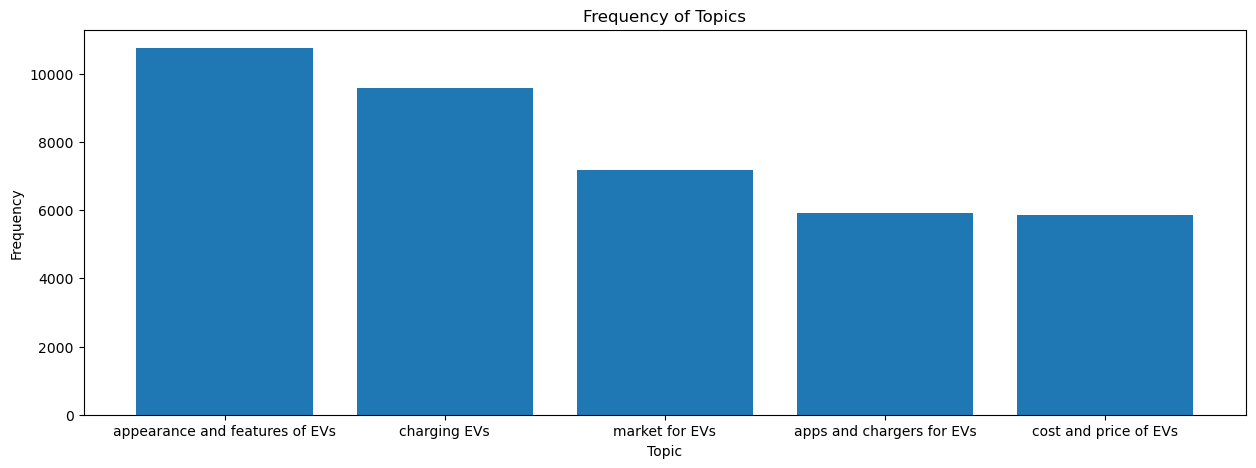

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the frequency of each topic and sentiment
topic_counts = general_df['New_Topic'].value_counts()
sentiment_counts = general_df['Sentiment'].value_counts()

# Plot the frequency of each topic
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(topic_counts.index, topic_counts.values)
ax.set_xlabel('Topic')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Topics')
plt.show()


## Visualize the frequency of each sentiment for each topic

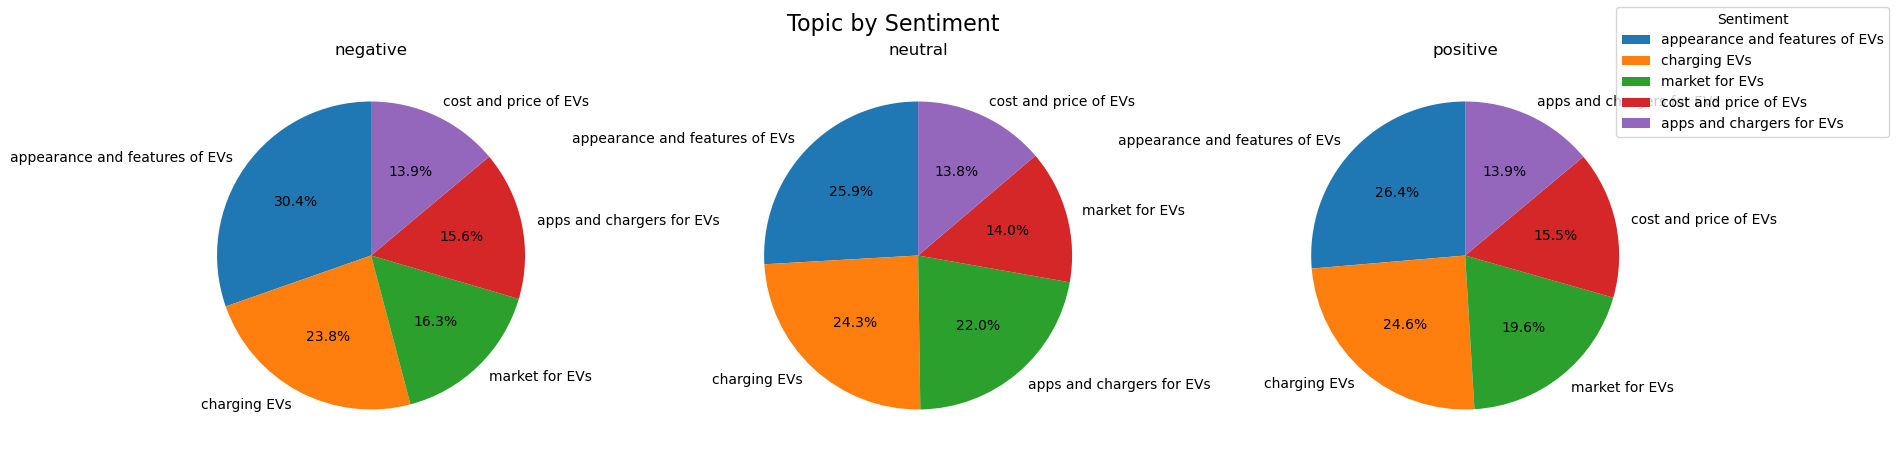

In [10]:
# Plot the frequency of each sentiment for each topic
import numpy as np

# Count the number of unique topics
num_topics = len(np.unique(general_df['Sentiment']))

# Create a new figure with multiple subplots
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

# Loop over each topic and create a pie chart on its corresponding subplot
for i, topic in enumerate(np.unique(general_df['Sentiment'])):
    topic_df = general_df[general_df['Sentiment'] == topic]
    sentiment_counts = topic_df['New_Topic'].value_counts()
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{topic}')

# Set the overall title for the figure
fig.suptitle('Topic by Sentiment', fontsize=16)

# Add the legend to the figure
fig.legend(sentiment_counts.index, title='Sentiment', loc='upper right')

plt.show()

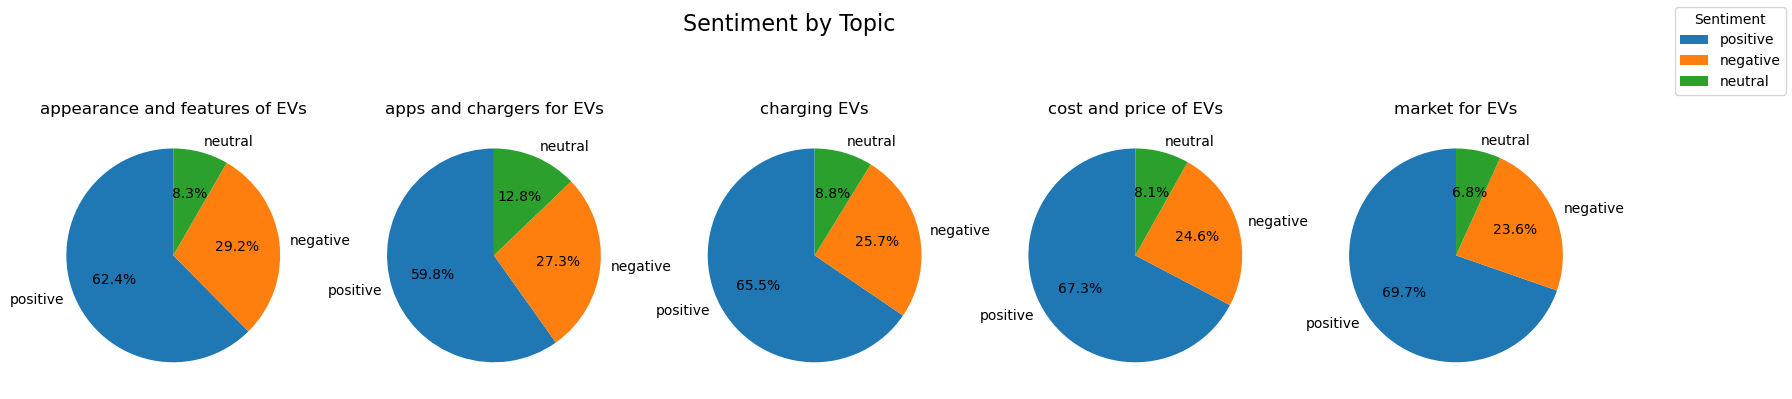

In [11]:
# Plot the frequency of each sentiment for each topic
import numpy as np

# Count the number of unique topics
num_topics = len(np.unique(general_df['New_Topic']))

# Create a new figure with multiple subplots
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

# Loop over each topic and create a pie chart on its corresponding subplot
for i, topic in enumerate(np.unique(general_df['New_Topic'])):
    topic_df = general_df[general_df['New_Topic'] == topic]
    sentiment_counts = topic_df['Sentiment'].value_counts()
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{topic}')

# Set the overall title for the figure
fig.suptitle('Sentiment by Topic', fontsize=16)

# Add the legend to the figure
fig.legend(sentiment_counts.index, title='Sentiment', loc='upper right')

plt.show()


## Explore deep more about charging

In [12]:
# Extract comments about charging
charge = general_df.loc[general_df['Topic'] == "Topic 7"]

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(charge['Reviews'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()
# Concatenate the original dataframe and the topics dataframe along the column axis
charge_topics = pd.concat([charge, topics_df], axis=1)
#charge_topics.to_csv("car_website_data/charge_topics.csv")

Topic 0:
['battery', 'charge', 'car', 'time', '100', 'charging', 'day', '80', 'set', 'dont']

Topic 1:
['charging', 'charger', 'charge', 'car', 'ev', 'trip', 'home', 'time', 'mile', 'range']

Topic 2:
['speed', 'regen', 'brake', 'mode', 'driving', 'use', 'time', 'mph', 'pedal', 'highway']

Topic 3:
['rate', 'charging', 'kwh', 'peak', 'time', 'kw', 'charge', 'hour', 'electricity', 'battery']

Topic 4:
['heat', 'cold', 'car', 'pump', 'battery', 'energy', 'heater', 'weather', 'range', 'winter']

Topic 5:
['tesla', 'tire', 'code', 'car', 'model', 'link', 'save', 'camera', 'amazon', 'wheel']

Topic 6:
['mile', 'range', 'car', 'driving', 'drive', 'trip', 'like', 'highway', 'time', 'winter']

Topic 7:
['car', 'charging', 'mile', 'day', 'time', 'minute', 'charge', 'like', 'use', 'gas']

Topic 8:
['time', 'charging', 'trip', 'stop', 'charge', 'car', 'gas', 'hour', 'station', 'need']

Topic 9:
['time', 'storm', 'need', 'live', 'lot', 'texas', 'austin', 'rain', 'area', 'driving']



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
charge_topics=charge_topics.dropna()
# Combine all comments into a single string
comments = ' '.join(charge_topics['Reviews'])

import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# download the stop words if you haven't already done so
nltk.download('stopwords')

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year','charging','charge'])

# tokenize the comments
tokens = nltk.word_tokenize(comments)

# remove the stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

# calculate the frequency of the remaining words
word_freq = defaultdict(int)
for token in filtered_tokens:
    word_freq[token] += 1

# print the top 10 most frequent words
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(f"{word}: {freq}")



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


’: 940
mile: 857
charger: 730
range: 663
battery: 523
trip: 518
gas: 460
station: 449
drive: 413
home: 375
day: 372
hour: 368
road: 301
go: 297
work: 285
driving: 271
minute: 268
every: 263
long: 242
take: 241
fast: 233
around: 228
ice: 226
stop: 221
really: 218


In [15]:
# Extract comments about appearance
appearance = general_df.loc[general_df['Topic'] == "Topic 2"]

# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(appearance['Reviews'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()
# Concatenate the original dataframe and the topics dataframe along the column axis
appearance_topics = pd.concat([appearance, topics_df], axis=1)

Topic 0:
['car', 'issue', 'like', 'paint', 'sound', 'rear', 'service', 'tesla', 'good', 'wash']

Topic 1:
['car', 'black', 'look', 'white', 'like', 'light', 'color', 'bumper', 'got', 'make']

Topic 2:
['car', 'brake', 'time', 'camera', 'lane', 'issue', 'turn', 'wiper', 'like', 'drive']

Topic 3:
['car', 'like', 'door', 'thing', 'open', 'parking', 'way', 'tesla', 'key', 'garage']

Topic 4:
['car', 'wheel', 'control', 'steering', 'button', 'climate', 'time', 'like', 'screen', 'use']

Topic 5:
['car', 'button', 'tesla', 'door', 'screen', 'like', 'control', 'touch', 'dont', 'driver']

Topic 6:
['car', 'like', 'look', 'wheel', 'got', 'time', 'mat', 'cover', 'window', 'good']

Topic 7:
['car', 'like', 'time', 'turn', 'light', 'dont', 'im', 'look', 'hitch', 'thing']

Topic 8:
['seat', 'light', 'time', 'car', 'high', 'door', 'beam', 'battery', 'model', 'quality']

Topic 9:
['seat', 'car', 'heated', 'wheel', 'got', 'steering', 'like', 'rear', 'battery', 'sensor']



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
appearance_topics=appearance_topics.dropna()
# Combine all comments into a single string
comments = ' '.join(appearance_topics['Reviews'])

import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# download the stop words if you haven't already done so
nltk.download('stopwords')

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year','charging','charge','drive','driving'])

# tokenize the comments
tokens = nltk.word_tokenize(comments)

# remove the stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

# calculate the frequency of the remaining words
word_freq = defaultdict(int)
for token in filtered_tokens:
    word_freq[token] += 1

# print the top 10 most frequent words
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(f"{word}: {freq}")


’: 545
button: 242
screen: 195
control: 175
wheel: 172
seat: 167
door: 146
good: 123
steering: 117
issue: 116
work: 116
update: 107
take: 100
really: 99
system: 98
better: 97
look: 94
driver: 93
rear: 92
window: 92
3: 90
physical: 88
turn: 87
right: 83
front: 81


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Extract comments about market
cost = general_df.loc[general_df['Topic'] == "Topic 6"]

# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cost['Reviews'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()
# Concatenate the original dataframe and the topics dataframe along the column axis
cost_topics = pd.concat([cost, topics_df], axis=1)

Topic 0:
['battery', 'mineral', 'component', 'toyota', 'requirement', 'critical', 'vehicle', 'guidance', 'material', 'car']

Topic 1:
['ev', 'car', 'x200b', 'china', 'chinese', 'company', 'american', 'europe', 'ford', 'like']

Topic 2:
['tesla', 'car', 'ev', 'price', 'company', 'market', 'charging', 'model', 'like', 'year']

Topic 3:
['car', 'hydrogen', 'emission', 'like', 'cost', 'dont', 'make', 'people', 'time', 'new']

Topic 4:
['car', 'ev', 'people', 'vehicle', 'like', 'going', 'state', 'thing', 'market', 'year']

Topic 5:
['tax', 'credit', '7500', 'year', 'vehicle', 'qualify', 'income', 'ev', '2023', 'irs']

Topic 6:
['ev', 'car', 'battery', 'vehicle', 'ice', 'year', 'people', 'time', 'electric', 'cost']

Topic 7:
['ev', 'tesla', 'gm', 'year', 'time', 'production', 'car', 'battery', 'make', 'ford']

Topic 8:
['ev', 'like', 'year', 'bus', 'time', 'bolt', 'state', 'new', 'charger', 'maybe']

Topic 9:
['car', 'vehicle', 'make', 'model', 'people', 'ev', 'new', 'electric', 'buy', 'rang

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
cost_topics=cost_topics.dropna()
# Combine all comments into a single string
comments = ' '.join(cost_topics['Reviews'])

import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# download the stop words if you haven't already done so
nltk.download('stopwords')

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year','charging','charge','drive','driving','battery','company','charger','better'])

# tokenize the comments
tokens = nltk.word_tokenize(comments)

# remove the stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

# calculate the frequency of the remaining words
word_freq = defaultdict(int)
for token in filtered_tokens:
    word_freq[token] += 1

# print the top 10 most frequent words
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(f"{word}: {freq}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


’: 948
ice: 324
price: 309
market: 287
cost: 270
credit: 255
tax: 254
electric: 240
sale: 238
phev: 208
emission: 196
gas: 196
point: 189
way: 179
production: 179
network: 173
money: 173
buy: 167
le: 165
really: 165
take: 164
manufacturer: 164
bev: 162
phevs: 161
well: 157


In [19]:
# Extract comments about charger or app
cost = general_df.loc[general_df['Topic'] == "Topic 8"]

# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cost['Reviews'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()
# Concatenate the original dataframe and the topics dataframe along the column axis
charger_topics = pd.concat([cost, topics_df], axis=1)

Topic 0:
['car', 'unlock', 'time', 'door', 'got', 'thank', 'try', 'right', 'update', 'phone']

Topic 1:
['phone', 'car', 'cable', 'work', 'like', 'use', 'usb', 'usbc', 'wifi', 'know']

Topic 2:
['phone', 'carplay', 'android', 'car', 'auto', 'wireless', 'apple', 'use', 'screen', 'like']

Topic 3:
['charger', 'time', 'car', 'charge', 'app', 'charging', 'update', 'ea', 'ive', 'issue']

Topic 4:
['tesla', 'cc', 'charger', 'car', 'network', 'charging', 'plug', 'charge', 'use', 'station']

Topic 5:
['time', 'car', 'dealer', 'like', 'think', 'problem', 'update', 'work', 'ea', 'week']

Topic 6:
['app', 'car', 'update', 'issue', 'work', 'time', 'use', 'start', 'kia', 'like']

Topic 7:
['tesla', 'car', 'software', 'update', 'beta', 'fsd', 'work', 'time', 'issue', 'like']

Topic 8:
['card', 'charging', 'car', 'use', 'app', 'key', 'credit', 'charge', 'station', 'charger']

Topic 9:
['charger', 'map', 'tesla', 'use', 'charging', 'route', 'abrp', 'station', 'plugshare', 'app']



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
charger_topics=charger_topics.dropna()
# Combine all comments into a single string
comments = ' '.join(charger_topics['Reviews'])

import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# download the stop words if you haven't already done so
nltk.download('stopwords')

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year','charging','charge','drive','driving','battery','company','charger','better'])

# tokenize the comments
tokens = nltk.word_tokenize(comments)

# remove the stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

# calculate the frequency of the remaining words
word_freq = defaultdict(int)
for token in filtered_tokens:
    word_freq[token] += 1

# print the top 10 most frequent words
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(f"{word}: {freq}")

’: 355
cc: 198
app: 187
work: 159
ea: 147
plug: 144
network: 142
card: 140
station: 135
issue: 111
phone: 104
problem: 72
using: 66
supercharger: 66
way: 65
experience: 64
ive: 64
every: 62
credit: 60
good: 60
location: 57
standard: 57
go: 55
different: 55
apple: 55


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Extract comments about price
cost = general_df.loc[general_df['Topic'] == "Topic 5"]

# Convert the comments into a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cost['Reviews'])

# Fit an LDA model to the data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_topics = lda.fit_transform(X)

# Create a dataframe with the topic labels for each comment
topic_labels = [f"Topic {topic_idx}" for topic_idx in X_topics.argmax(axis=1)]
topics_df = pd.DataFrame({'Topic': topic_labels})
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[::-1][:10] # get the indices of the top 10 words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)
    print()
# Concatenate the original dataframe and the topics dataframe along the column axis
charger_topics = pd.concat([cost, topics_df], axis=1)

Topic 0:
['price', 'dealer', 'car', 'msrp', 'markup', 'market', 'sell', 'like', 'demand', 'ev']

Topic 1:
['price', 'tesla', 'got', 'tax', 'dealer', 'car', 'model', 'ford', 'credit', 'markup']

Topic 2:
['price', 'dealer', 'car', 'msrp', 'markup', 'dealership', 'make', 'buy', 'model', 'tesla']

Topic 3:
['truck', 'ford', 'lightning', 'f150', 'ev', 'got', 'time', 'like', 'cab', 'bed']

Topic 4:
['car', 'rate', 'tesla', 'like', 'month', 'loan', 'got', 'credit', 'going', 'cost']

Topic 5:
['car', 'buy', 'people', 'like', 'price', 'money', 'new', 'year', 'dont', 'make']

Topic 6:
['gas', 'cost', 'car', 'ev', 'mile', 'make', 'fuel', 'electricity', 'gallon', 'state']

Topic 7:
['car', 'dealer', 'price', 'people', 'buy', 'new', 'month', 'pay', 'money', 'got']

Topic 8:
['tax', 'credit', 'price', 'lease', 'car', 'rebate', '7500', 'ev', 'year', 'model']

Topic 9:
['got', 'like', 'ev', 'cost', 'solar', 'diesel', 'fee', 'rate', 'time', 'van']



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
charger_topics=charger_topics.dropna()
# Combine all comments into a single string
comments = ' '.join(charger_topics['Reviews'])

import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# download the stop words if you haven't already done so
nltk.download('stopwords')

# Define a set of stopwords to remove from the word cloud
stopwords = set(['car', 'vehicle', 'see', 'think', 'people', 'use', 'tesla', 'one','even','going','ev',
                'also','would','used','model','that','leaf','get','got','thing','still',
                'thats','said','say','maybe','could','dont','actually','getting','im','though',
                'lot','u','many','didnt','much','toyota','know','back','want','since','without','like','time',
                'new','make','need','year','charging','charge','drive','driving','battery','company','charger','better'])

# tokenize the comments
tokens = nltk.word_tokenize(comments)

# remove the stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

# calculate the frequency of the remaining words
word_freq = defaultdict(int)
for token in filtered_tokens:
    word_freq[token] += 1

# print the top 10 most frequent words
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:25]:
    print(f"{word}: {freq}")

’: 183
price: 181
tax: 95
cost: 76
credit: 68
buy: 58
gas: 56
dealer: 50
pay: 48
ford: 46
money: 46
3: 45
sell: 44
month: 44
sale: 35
bought: 35
bolt: 35
truck: 33
market: 33
cheaper: 33
”: 32
value: 32
paying: 31
le: 30
2: 30


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
